# C3 Capstone: Loan Interest Rates

Welcome to this course capstone, where you will be applying everything you have learned throughout the course.

## Background:
You've joined a fintech startup tasked with improving customer loan offers. Using the [🔗Bondora P2P Loans](https://www.kaggle.com/datasets/marcobeyer/bondora-p2p-loans?select=LoanData.csv) dataset, you'll build build insights about what factors help determine a person's interest rate. You will work your way to creating a predictive model to estimate loan interest rates, which will guide your company in personalizing loan terms efficiently.


The features used in this lab are:

- `VerificationType`: Method used for loan application data verification
- `Age`: Age of the borrower (years)
- `AppliedAmount`: Amount applied
- `Amount`: Amount the borrower received
- `Interest`: Interest rate
- `LoanDuration`: The loan term
- `Education`: Education of the borrower
- `EmploymentDurationCurrentEmployer`: Employment time with the current employer
- `HomeOwnershipType`: Home ownership type
- `IncomeTotal`: Total income
- `ExistingLiabilities`: Borrower's number of existing liabilities
- `RefinanceLiabilities`:  The total amount of liabilities after refinancing
- `Rating`: Bondora Rating issued by the Rating model
- `NoOfPreviousLoansBeforeLoan`: Number of previous loans
- `AmountOfPreviousLoansBeforeLoan`: Value of previous loans

## In order for your submission to be graded correctly, you **MUST**:
* **Use the provided variable names**. If you change them, the autograder will not be able to locate the variable for grading. 

* **Replace any instances of `None` with your own code.** Some may be inside a commented line, so please read the code carefully. You may see parts of a solution already filled in, while others use the placeholder `None` . You will need to replace every instance of `None` by your own solution. 

* **Only modify the cells that start with the comment `# GRADED CELL`**. All other cells are already set up, and you only need to run them. 

* **Use the provided cells for your solution.** You can add new cells to experiment, but these will be omitted when grading. Some cells are already completed for you and are not modifiable, which ensures that the grader uses the same variables and settings as you. 

To submit your solution, save it, then click on the blue submit button at the top of the page.

<div style="background-color: #FAD888; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">
<strong>Important note</strong>: Having all the placeholders for where your code should go will inevitably create errors, so don't try to run the notebook before completing the exercises. You can run the cells as you complete them to see that the code is running and giving the correct results.
</div>

## Table of Contents
- [Step 1: Importing Libraries](#step-1)
- [Step 2: Load and Clean the Data](#step-2)
    - [Load the data](#load-the-data)
    - [Cleaning the Dataset](#cleaning-the-dataset)
        - [Exercise 1: Set Index](#ex1)
- [Step 3: Retrieving Key Metrics](#step-3)
    - [Describing the Dataset](#describing-the-dataset)
        - [Exercise 2: Descriptive Statistics](#ex2)
    - [High-Risk Customers](#high-risk-customers)
        - [Exercise 3: Identifying High-Risk customers](#ex3)
- [Step 4: Understanding different customer profiles](#step-4)
    - [Visualization of Different Profiles](#visualization-of-different-profiles)
        - [Exercise 4: Segmentation Using Box Plots](#ex4)
        - [Exercise 5: Scatter Plots and Correlation](#ex5)
    - [Applied and Received Amounts](#applied-and-received-amounts)
        - [Exercise 6: Confidence Intervals](#ex6)
- [Step 5: Modelling the Interest Rate](#step-5)
    - [Simple Linear Regression](#categorical-features)
        - [Exercise 7: Training the Linear Regression](#ex7)
    - [Building a More Complex Linear Regression Model](#building-the-linear-regression-model)
        - [Exercise 8: Building and Refining the Model](#ex8)

<a id="step-1"></a>

## Step 1: Importing libraries

Before you start working on the dataset, it is good practice to import all libraries at the beginning of your code. 

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">

**▶▶▶ Directions**     
1. Run the cell below to import the following libraries: Pandas, Matplotlib's Pyplot and Seaborn.
        
</div>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from math import sqrt

<a id="step-2"></a>

## Step 2: Load and Clean the Data

<a id="load-the-data"></a>

### Load the Data
Now that you have imported the right libraries, you can use Pandas to load the data from the CSV. 

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">

**▶▶▶ Directions**
        
1. Run the cell below to:
    1. Import the data
    2. Save the DataFrame into a variables named <code>cars</code>
    3. View the data using the <code>head()</code> method
            
        
</div>

In [5]:
# 🔒This cell is locked. You will not be able to edit it.
# load the data
df = pd.read_csv("data/LoanData.csv")
df.head()

,LoanId,NewCreditCustomer,LoanDate,VerificationType,Age,Gender,Country,AppliedAmount,Amount,Interest,...,EmploymentDurationCurrentEmployer,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,Rating,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan
0,D8EBF360-104C-420F-BEC9-000924E6EFC7,False,2022-09-09,By Bank Statement,27,Female,EE,3189.0,3189.0,35.48,...,UpTo5Years,Other,900.0,0,0.00,0,D,1.0,3402.0,0.0
1,C1A98DDA-5E20-429C-BBFF-0009A05354E0,False,2023-05-19,By Bank Statement,35,Female,FI,4146.0,4146.0,19.86,...,UpTo5Years,Owner,3100.0,0,0.00,0,B,1.0,518.0,0.0
2,9B0B252E-45B9-4172-8E2D-0014A8F18117,False,2024-02-03,By Bank Statement,23,Male,EE,531.0,531.0,19.52,...,UpTo5Years,TenantFurnished,1700.0,0,0.00,0,B,3.0,1593.0,0.0
3,66AE108B-532B-4BB3-BAB7-0019A46412C1,False,2016-03-23,By Bank Statement,53,Female,EE,2125.0,2125.0,20.97,...,MoreThan5Years,Owner,354.0,8,485.09,6,C,1.0,500.0,0.0
4,C7EA512A-465D-4043-A9F2-001B14C3C14E,False,2023-09-26,By Bank Statement,43,Male,FI,414.0,414.0,19.89,...,Other,TenantFurnished,1200.0,0,0.00,0,D,5.0,11198.0,0.0


<a id="cleaning-the-dataset"></a>

### Cleaning the Dataset

Before starting your analysis, take some time to familiarize yourself with the dataset to understand the available information. This is also a good opportunity to clean the data by removing missing values and adjusting the index.

<a id="ex1"></a>

#### Exercise 1: Set the Index

Explore the dataset to find the number of rows, columns, and data types of each feature. Identify any missing values.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">

**▶▶▶ Directions**
1. Since the loan ID is unique identifier for each loan, set the `"LoanId"` column as the index

</div>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
- To set the index to one of the columns in the DataFrame, you can use the `set_index()` method. Again, remember to set `inplace=True`.
</ul>
</details>


In [6]:
# GRADED CELL: exercise 1

### START CODE HERE ###

# set the "LoanId" column as index
df.set_index(["LoanId"], inplace=True)

### END CODE HERE ###

In [7]:
# 🔒This cell is locked. You will not be able to edit it.
# check the index is correct
df.index.name

'LoanId'

<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>
<span style="font-size: 11px;">

```mkdn
'LoanId'
```
</span>
</details>


<a id="step-3"></a>

## Step 3: Retrieving key metrics
To recommend loan offers, take a moment to understand the loan amounts and ratings. You’ll also want to get a rough idea of the interest rates being paid.

<a id="describing-the-dataset"></a>

### Describing the dataset 

<a id="ex2"></a>

#### Exercise 2: descriptive statistics


<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">

**▶▶▶ Directions**
        
1. Find the sample mean and standard deviation for `"Interest"`
2. Find the number of times borrowers got a lower amount than they applied for
3. Use `.value_counts()` to explore the proportion of each rating in the dataset       

</div>



<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- To get the sample mean and standard deviation you can use the `mean()` and `std()` methods
- To find the number of borrowers who received a smaller amount than requested you need to compare the `"Amount"` and `AppliedAmount` columns, and then sum the boolean results.
- You can find the proportion using the `value_counts()` method, and divide the results by the total number of samples 
</details>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 383382 entries, D8EBF360-104C-420F-BEC9-000924E6EFC7 to 2d97edb2-dda3-4454-b736-daaf303e7feb
Data columns (total 21 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   NewCreditCustomer                       383382 non-null  bool   
 1   LoanDate                                383382 non-null  object 
 2   VerificationType                        383382 non-null  object 
 3   Age                                     383382 non-null  int64  
 4   Gender                                  383382 non-null  object 
 5   Country                                 383382 non-null  object 
 6   AppliedAmount                           383382 non-null  float64
 7   Amount                                  383382 non-null  float64
 8   Interest                                383382 non-null  float64
 9   LoanDuration                            383382 non-nul

In [9]:
df.Rating

LoanId
D8EBF360-104C-420F-BEC9-000924E6EFC7    D
C1A98DDA-5E20-429C-BBFF-0009A05354E0    B
9B0B252E-45B9-4172-8E2D-0014A8F18117    B
66AE108B-532B-4BB3-BAB7-0019A46412C1    C
C7EA512A-465D-4043-A9F2-001B14C3C14E    D
                                       ..
47a1fe49-575a-4b00-aa06-b1d400db7ccc    B
32db2947-840f-4300-9d1b-b1d400dccc23    D
7c9aaeba-8168-4bec-a186-b1d400de2b3c    B
32985dab-c577-43fd-a18d-b1d400de6091    A
2d97edb2-dda3-4454-b736-daaf303e7feb    C
Name: Rating, Length: 383382, dtype: object

In [10]:
# GRADED CELL: Exercise 2

### START CODE HERE ###

# find the sample mean and std of the "Interest" column
interest_mean = df["Interest"].mean()
interest_std = df["Interest"].std()

# find the number of borrowers that received a smaller "Amount" than they asked for ("AppliedAmount")

num_less_amount = sum(df['Amount'] < df['AppliedAmount'])

# find the proportion of loan ratings
rating_proportion = df['Rating'].value_counts(normalize=True)


### END CODE HERE ###

In [11]:
# 🔒This cell is locked. You will not be able to edit it.
# print the results
print("Interest rate mean:", round(interest_mean, 2))
print("Interest rate standard deviation:", round(interest_std,2))
print("Number of borrowers that received less money than they asked for:", num_less_amount)
print("Proportion of loan ratings:\n", rating_proportion.sort_index())

Interest rate mean: 27.29
Interest rate standard deviation: 18.03
Number of borrowers that received less money than they asked for: 10543
Proportion of loan ratings:
 Rating
A     0.043291
AA    0.024826
B     0.179124
C     0.317741
D     0.206457
E     0.115707
F     0.074443
HR    0.038411
Name: proportion, dtype: float64


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 


<br>
<small>

```mkdn
Interest rate mean: 27.29
Interest rate standard deviation: 18.03
Number of borrowers that received less money than they asked for: 10543
Proportion of loan ratings:
 Rating
A     0.043291
AA    0.024826
B     0.179124
C     0.317741
D     0.206457
E     0.115707
F     0.074443
HR    0.038411
Name: count, dtype: float64
```
</small>
</details>

<a id="high-risk-customers"></a>

### High-Risk Customers

Customers with a high debt-to-income ratio and less job stability may have more difficulty repaying loans, making them riskier.

<a id="ex3"></a>

#### Exercise 3: Identifying High-Risk Customers
You want to identify these customers and be able to add a flag to their loans. You consider borrowers to have less job stability if they have been on the current job for less than 1 year (including those in the trial period). In this scenario, a loan-to-rate ratio above 0.35 is considered risky.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">

**▶▶▶ Directions**
        
1. Add a column named `"DebtToIncome"` with the ratio between "Amount" and "IncomeTotal"
2. Create a new column called `"IsRisky"`, which is `True` if the loan is risky, and `False` otherwise
    * To assess wether a loan is risky Check if the borrower has a `"DebtToIncome"` **greater than or equal** to 0.35, **and** the employment duration is "TrialPeriod" or  "UpTo1Year"
3. Find the proportion of risky loans
4. Find the mean interest rate for risky loans
5. Find the mean interest rate for non-risky loans

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- To fill the new "IsRisky" column, you need to check which rows have `df["DebtToIncome"] >= 0.35` **and** `df["EmploymentDurationCurrentEmployer"].isin(["TrialPeriod", "UpTo1Year"])`. The "IsRisky" column should have value `True` if the two conditions are met, `False` otherwise
- When checking the two conditions, remember to use parentheses appropriately.
- Remember the proportion of risky loans is the ratio between the risky loans and the total number of loans in the dataset. 
- You can get the number of risky loans by summing the values in the "IsRisky" column. Remember that `True` counts as a 1, and
- To get the mean interest rate of risky loans, first pick only the rows where "IsRisky" is `True`. Then look at the "Interest" column and use `.mean()` to find the average interest rate.
- Similarly, you can filter the non-risky loans by checking if "IsRisky" is `False`.
</details>

In [12]:
# GRADED CELL: exercise 3

### START CODE HERE ###

# create the column "DebtToIncome" 
df["DebtToIncome"] = df["Amount"] / df["IncomeTotal"]

# create a new column "IsRisky" that is True if the loan is risky
df["IsRisky"] = (df["DebtToIncome"] >= 0.35) & (df["EmploymentDurationCurrentEmployer"].isin(["TrialPeriod", "UpTo1Year"]))

# calculate the proportion of risky loans
risky_loans_count = df["IsRisky"].sum()  # Count the number of risky loans (True values)
total_loans_count = len(df)  # Total number of loans
risky_proportion = risky_loans_count / total_loans_count  # Proportion of risky loans

# calculate the mean interest rate of the risky loans
mean_interest_risky = df[df["IsRisky"]]["Interest"].mean()

# calculate the mean interest rate of the non-risky loans
mean_interest_non_risky = df[~df["IsRisky"]]["Interest"].mean()

### END CODE HERE ###

In [13]:
# 🔒This cell is locked. You will not be able to edit it.
# print the results
print("Risky loans proportion:", round(risky_proportion, 4))
print("Mean interest rate of risky loans:", round(mean_interest_risky, 4))
print("Mean interest rate of non-risky loans:", round(mean_interest_non_risky, 4))

Risky loans proportion: 0.1588
Mean interest rate of risky loans: 28.8592
Mean interest rate of non-risky loans: 26.9899


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 


<br>
<small>

```mkdn
Risky loans proportion: 0.1588
Mean interest rate of risky loans: 28.8592
Mean interest rate of non-risky loans: 26.9899
```
</small>
</details>

**Reflect:** Compare the interest rate for risky loans with that of the non-risky ones, and the interest rate of the total dataset. Does it seem to reflect a riskier nature?

<a id="step-4"></a>

## Step 4: Understanding different customer profiles

As a fintech analyst, understanding customer profiles allows you to identify patterns. You want to understand how different factors of the borrowers influence loan applications. 

<a id="visualization-of-different-profiles"></a>

### Visualization of different profiles

To help you identify the different profiles, you decide to use your visualization skills to uncover actionable patterns for tailoring loan offers.

<a id="ex4"></a>
#### Exercise 4: Segmentation using box plots
<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">

**▶▶▶ Directions**
1. Create a figure with size (10, 6)
2. Use that figure to create a horizontal box plot of the "Interest" for each category in "Education". The interest rates should be on the x-axis, and education level on the y-axis
3. Improve the chart
    1. Set the x-axis label to "Interest Rate"
    2. Use  the "colorblind" color palette
    3. Set the title to "Interest Rate by Education Level"
    4. Despine the chart by removing the top and right borders
</div>



<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">

- To create the box plot with all the desired features, like the custom color palette, you will need to create the chart using the Seaborn library
- You should use the `sns.boxplot()` function. In order to complete all the required steps, you need to set the arguments `data`, `x`, `y`, `hue` and `palette`. `hue` should be the same value as `y`
- For the x-axis label and the title you can use the `plt.xlabel()` and `plt.title()` functions respectively
- To despine the chart, you can use the `sns.despine()` function. You will then need to set the borders you want to remove to True. For example, to remove the left border it would look like `sns.despine(left=True)`
</ul>
</details>

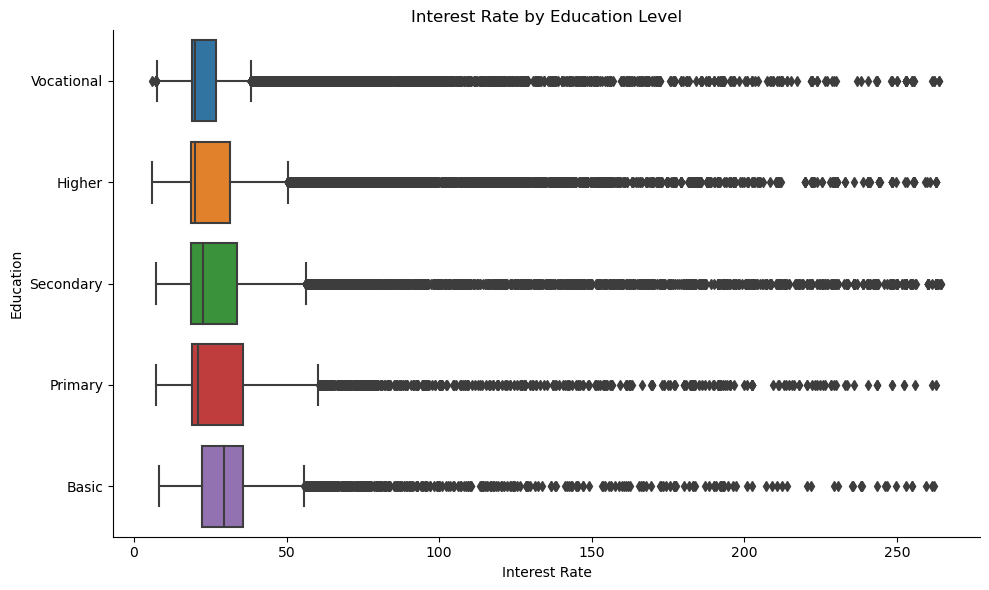

In [16]:
# GRADED CELL: Exercise 4

### START CODE HERE ###

# create the figure with size (10,6)
plt.figure(figsize=(10,6))

# create the interest rate by segmentation plot
boxplot_ax = sns.boxplot(df, x="Interest", y="Education")

# set the x-axis label
plt.xlabel("Interest Rate")

# set the title
plt.title("Interest Rate by Education Level")

# despine the plot
sns.despine(top=True, right=True) 

### END CODE HERE ###

plt.tight_layout()
plt.show()

<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 

<img src="imgs/boxplots.png" width="650">

</details>

<a id="ex5"></a>

#### Exercise 5: Scatter plots and correlation
You also want to investigate the relationship between certain numerical features and the interest rate. For that, you decide to use scatter plots, along with the correlation between features.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">

**▶▶▶ Directions**
        
1. Create a list named `corr_columns` with the columns you want to use for segmentation: "LoanDuration", "IncomeTotal", "AmountOfPreviousLoansBeforeLoan", and "DebtToIncome"
2. Create a `for` loop to iterate over the indexes for each subplot you want to create. Remember that subplots start counting at 1.
3. In each iteration:
    1. Create a new `subplot`, it should have 2 rows and 2 columns
    2. Create a scatter plot between the current `corr_columns` value and `Interest`. You want `Interest` in the y-axis
    3. Calculate the correlation between the current feature and `Interest`
    4. Add it to the `correlation` list
4.  Set the suptitle of the figure to "Correlation between Interest Rate and Loan Duration, Total Income, Amount Of Previous Loans Before Loan, and Debt To Income"
</div>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- To create a new subplot, you should use the `plt.subplot()` function. Remember to pass the number of rows, number of columns, and the number of plot you are creating. Remember that the plots start counting at 1.
- To create the scatter plot in each iteration you should use the `sns.scatterplot()` function. In order to complete all the required steps, you need to set the arguments `data`, `x`, `y`, `hue` and `ax`. In this case, both `hue` and `y` need to be assigned the same column name
- To find the correlation between variables you can use the `.corr()` method.
- To add a general title to the figure, you can use the `plt.suptitle()` function. 

</ul>
</details>

In [15]:
# GRADED CELL: Exercise 5

scatterplot_fig = plt.figure(figsize=(12, 8))

# create a list to store the correlation values
correlation = []

# create a list of segmentation columns
corr_columns = ["LoanDuration", "IncomeTotal", "AmountOfPreviousLoansBeforeLoan", 
               "DebtToIncome"]

### START CODE HERE ###

# iterate over the values 1-4 (one for each subplot)
for i in None:

    # get the column name. Remember subtract 1 from i to match the list's indexing
    column_name = None

    # create the subplot. Remember the arguments are (rows, columns, index)
    None

    # create scatter plot
    None(None, None, None,
                            )

    # calculate the correlation between the column and the interest rate
    corr = None

    # append the correlation value to the list
    correlation.None(None)

    # print the results
    print("Correlation between Interest Rate and " + column_name+ ":\n"+ str(round(corr,4))) 

# set the general title
None

### END CODE HERE ###

plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (1006076143.py, line 31)

<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 

<img src="imgs/scatter.png" width="650">

</details>

What can you say about these different features? Which ones do you think have a greater impact on the interest rate?

<a id="applied-and-received-amounts"></a>

### Applied and Received Amounts
You noticed that there are two similar columns, "AppliedAmount" and "Amount", in the dataset. This implies that sometimes borrowers get loaned a different amount than what they asked for. 

<a id="ex6"></a>

#### Exercise 6: Confidence Intervals

If more than 5% of loans are approved for less than requested, the team may need to revise how loan amounts are communicated to applicants. Estimate this proportion using a confidence interval to support your recommendation.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">

**▶▶▶ Directions**
        
1. Calculate the sample proportion of loans where the approved "Amount" is less than "AppliedAmount".
2. Find the margin of error for the 95% confidence interval. Recall that for proportions the mean is given by $\hat{p}$, and the standard error follows this equation: $\sqrt{\frac{\hat p (1-\hat p)}{n}}$.

    When using the `stats.norm.interval()` function for proportions the argument `loc` is the sample proportion, while `scale` is the standard error for proportions
3. Calculate the 95% confidence interval using the `stats` library.
</div>



<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- To find the number of loans where the approved amount is less than the requested, compare the "Amount" and "AppliedAmount" columns, then sum the resulting boolean Series. This can be done in a single line of code.
- To find the confidence interval, you can use the `stats.norm.interval`function. Remember you need too pass the arguments:
    - confidence level (as a number between 0 and 1 )
    - `loc`: sample proportion
    - `scale`: standard error 
- To find the square root of a number you can use the `math.sqrt()` function.

</ul>
</details>

In [ ]:
# GRADED CELL: Exercise 6

### START CODE HERE ###

# get the number of samples where "AppliedAmount" differs from the requested
# "Amount"
num_differences = (None < None).None()

# get the total number of samples
n = None

# calculate the sample proportion
phat = None

# calculate the standard error for proportions
se = None

# build the confidence interval
confidence_interval = None

### END CODE HERE ###

In [ ]:
# 🔒This cell is locked. You will not be able to edit it.
# print the results
print("The 95% confidence interval is", confidence_interval)

<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 


<br>
<small>

```mkdn
The 95% confidence interval is (0.02698232853687249, 0.028017645379482474)
```
</small>
</details>

The proportion of loans where the requested amount differs from the given amount is pretty small, so it should be safe to only analyze one of those columns.

<a id="step-5"></a>

## Step 5: Modelling the Interest Rate
To make personalized loan offers, you decide to go one step further in your analysis and build a model to predict interest rates using different customer features. This will help you both be able to predict interest rates for new customers, and observe which features are actually statistically significant in determining the interest rates. 

<a id="categorical-features"></a>

### Simple Linear Regression

To get your first model going you begin creating a simple linear regression. Based on the correlation analysis you did before, a good candidate for the independent variable is "AmountOfPreviousLoansBeforeLoan", which presented the strongest correlation with the target variable `"Interest"`. 

<a id="ex7"></a>

#### Exercise 7: Training the Linear Regression

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">

**▶▶▶ Directions**
        
1. Create the $X$ variable of predictors with the "AmountOfPreviousLoansBeforeLoan" variable. Don't forget to add the constant column
2. Define the $Y$ variable, the dependent variable `"Interest`
3. Create and fit the linear regression model
4. Print the model summary, and analyze the results
</div>


<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- To prepare the predictors you can select the desired column from the DataFrame, and the use the `sm.add_constant()` function. This function adds a column filled with 1s for the constant term
- To build the model, you can use the `sm.OLS()` model. You need to pass the regressors, and the dependent variable as arguments.
- To fit the model, call the `fit()` method
- The method `summary()` return the summary of your trained model
</details>

In [ ]:
# GRADED CELL: Exercise 7

### START CODE HERE ###

# prepare predictors. do not forget to add the constant term
X_simple = None

# select the dependent variable
Y_simple = None

# build the model
model_simple = None

# fit the model
results_simple = None

# Print the results summary
print(None)

### END CODE HERE ###

<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 


<br>
<small>

```mkdn
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Interest   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                 1.211e+04
Date:                Wed, 09 Apr 2025   Prob (F-statistic):               0.00
Time:                        08:36:15   Log-Likelihood:            -1.6468e+06
No. Observations:              383382   AIC:                         3.294e+06
Df Residuals:                  383380   BIC:                         3.294e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              29.4461      0.035    847.499      0.000      29.378      29.514
AmountOfPreviousLoansBeforeLoan    -0.0006   5.02e-06   -110.043      0.000      -0.001      -0.001
==============================================================================
Omnibus:                   379791.546   Durbin-Watson:                   1.482
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         27160279.930
Skew:                           4.815   Prob(JB):                         0.00
Kurtosis:                      43.094   Cond. No.                     8.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
```
</small>
</details>

Use this next cell to make some further analysis on your model. You are already given the line of best fit graph, but can add as many visualizations as you wish. **This cell is not graded** so you can experiment freely 

In [ ]:
plt.figure()
sns.scatterplot(data=df, x="AmountOfPreviousLoansBeforeLoan", y="Interest")
plt.plot(df["AmountOfPreviousLoansBeforeLoan"], results_simple.predict(X_simple), color="red")
plt.title("Simple Linear Regression: Line of best fit")
plt.xlabel("Amount Of Previous Loans Before Loan")
plt.ylabel("Interest Rate")
plt.show()

Does the chart make sense? Remember the sign of the correlation you found in Exercise 5. 

<a id="building-the-linear-regression-model"></a>

### Building a More Complex Linear Regression Model

Since predicting the interest rate using a single variable didn’t yield strong results, you decide to take a more comprehensive approach. This time, you’ll build a more complex model that includes multiple variables—possibly even some categorical ones.

**Reflect**: which variables would you use as predictors?

<a id="ex8"></a>

#### Exercise 8: Building and refining the model
This time, you will make the decision on which variables to use. Iterate until you are satisfied with the result. If you need to write any additional code, you can add a new cell by clicking on the $+$ button, and work there. 

**The code in any cell you add will not be graded**, so provide the final trained model in the provided cell with the `# GRADED CELL: Exercise 8` header. 

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">

**▶▶▶ Directions**
        
1. Create the list `predictors` with the columns you want to use as predictors. Include all categorical columns you want to use as well
2. Create a list with only the categorical columns. Make sure this match with the ones you included in `predictors`. If you are not using any categorical variables, you can leave the list empty
3. Create the predictor variable `X`.
    1. Perform the dummy encoding (if using any categorical variables).
    2. Add the constant term.
4. Select the target feature, and save it in variable `Y`.
5. Define the Linear Regression model.
6. Fit the model
3. Iterate on the model (add and/or remove variables) until you are satisfied with the results. Feel free to use any of the features in the dataset you think are appropriate.
</div>

**In order to pass the grading, your model needs to achieve an R-squared greater than 0.6, and all the included variables need to be statistically significant (p-value < 0.05)**

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- To get the dummy encodings you can use the `pd.get_dummies()` function. You will need to pass the following arguments:
    - `data`: DataFrame with the predictors you want to use
    - `columns`: the name of the columns you need to encode (the categorical variables)
    - `drop_first`: This needs to be set to `True` to avoid any collinearities between the new columns
    - `dtype`: set it to int, so you get a numeric value rather than a boolean.
- To add the constant term in the predictors DataFrame, you can again use `sm.add_constant()`
- To build the model, you can use the `sm.OLS()` model. You need to pass the regressors, and the dependent variable as arguments.
- To fit the model, call the `fit()` method
- If you are having trouble getting to a R-squared above 0.6, we suggest including the `"Rating"` variable as a predictor. 
</details>

In [ ]:
# GRADED CELL: Exercise 8

### START CODE HERE ###

# define a list with the column names you want to use as predictors
# include numerical and categorical variables
predictors = None

categorical = None

# create the predictors dataframe. do not forget to add the constant term
X = None(None(None, columns=None, drop_first=None, dtype=None))

# create the target variable
Y = None

# create the model
model = None

# fit the model
results = None

### END CODE HERE ###

print(results.summary())

Congratulations on finishing this graded lab! If everything is running correctly, you can go ahead and submit your code for grading.